# Plotting Notebook

In [1]:
import matplotlib.pyplot as plt
from prime_number_generation import generate_large_prime
import time

In [2]:
def get_average_run_time(func, iterations, input):
    start = time.time()
    for i in range(iterations):
        func(input)
    end = time.time()
    average_run_time = round(((end - start) * 1000) / iterations, 5) 

    return average_run_time # in milliseconds

In [4]:
N = [64, 128, 256, 512, 1024, 2048]

function_round_times = {
    bit_amount : get_average_run_time(generate_large_prime, 5, bit_amount)
    for bit_amount in N
}

In [5]:
print(function_round_times)

{64: 0.82521, 128: 3.7436, 256: 26.92542, 512: 415.79199, 1024: 7792.65637, 2048: 23121.45476}


6.933462328106543e-09


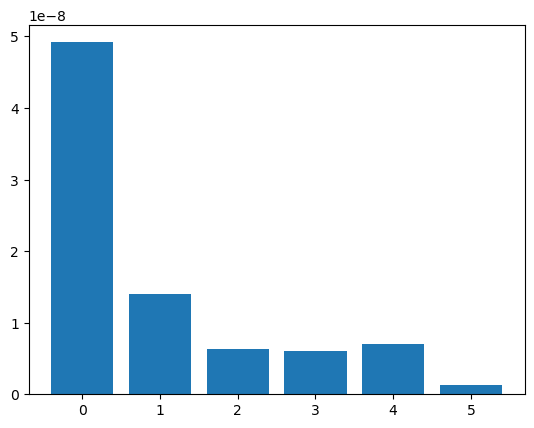

In [ ]:
# Estimate k
# O(n)
# kk = [y / (insert theoretical guess of n) for n, y in function_round_times.items()]

kk = [y / n**4 for n, y in function_round_times.items()]
plt.bar(range(len(kk)), kk)

k_theory = sum(kk[1:])/len(kk[1:]) 
print(k_theory) # Measured constant of proportionality for theoretical order (when using theoretial in n spot, then empirical when use it again)

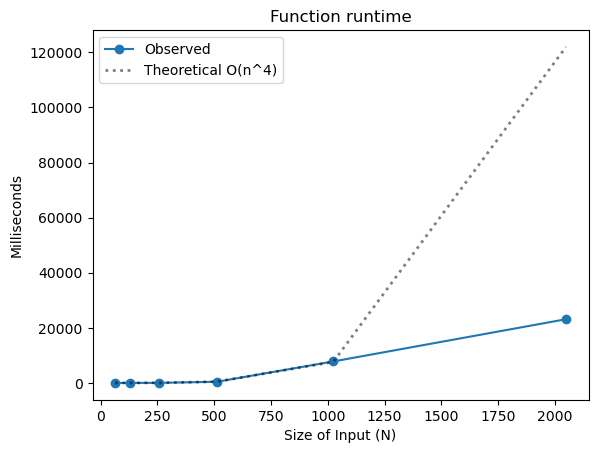

In [14]:
plt.plot(
    function_round_times.keys(),
    function_round_times.values(),
    marker='o'
)

def theory(n):
    return k_theory * n

# theory_y = [theory(x) for x in function_round_times.keys()]
theory_y = [k_theory * (x**4) for x in function_round_times.keys()]

plt.plot(
    function_round_times.keys(),
    theory_y,
    c='k',
    ls=':',
    lw=2,
    alpha=0.5
)

plt.legend(['Observed', 'Theoretical O(n^4)'])
plt.xlabel('Size of Input (N)')
plt.ylabel('Milliseconds')
plt.title('Function runtime');

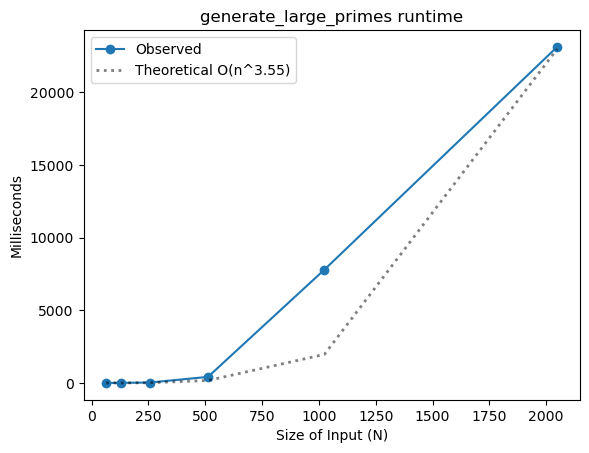

In [31]:
plt.plot(
    function_round_times.keys(),
    function_round_times.values(),
    marker='o'
)

def theory(n):
    return k_theory * n

# theory_y = [k_theory * (insert theory guess here) for x in function_round_times.keys()]

theory_y = [k_theory * (x**3.55) for x in function_round_times.keys()]

plt.plot(
    function_round_times.keys(),
    theory_y,
    c='k',
    ls=':',
    lw=2,
    alpha=0.5
)

plt.legend(['Observed', 'Theoretical O(n^3.55)'])
plt.xlabel('Size of Input (N)')
plt.ylabel('Milliseconds')
plt.title('generate_large_primes runtime');

# this gives you - Empirical order of growth (if different from theoretical): (n^3.2323) something lower, match line


1.0020532362591403e-07


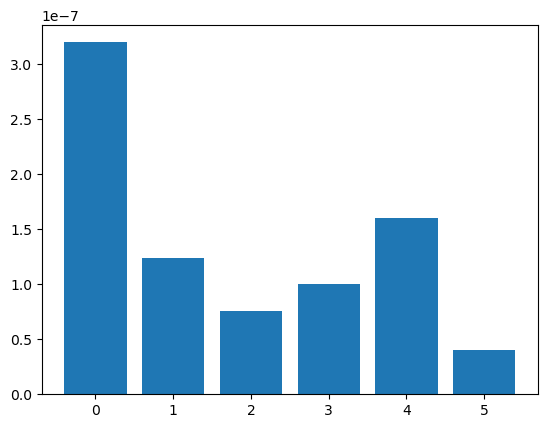

In [33]:
# Estimate k
# O(n)
# kk = [y / (insert theoretical guess of n) for n, y in function_round_times.items()]

kk = [y / n**3.55 for n, y in function_round_times.items()]
plt.bar(range(len(kk)), kk)

k_theory = sum(kk[1:])/len(kk[1:]) 
print(k_theory) # Measured constant of proportionality for theoretical order (when using theoretial in n spot, then empirical when use it again)